## BITCOIN Verisi ile Time Series Analysis

In [130]:
#Bitcoin veri setinden time series analysis uygulayarak uygun modeli elde etmek

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
coin = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')
coin.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1417412280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1417412340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1417412520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.1 Veri Temizleme

In [3]:
coin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


In [4]:
coin.isnull().sum()

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [5]:
coin=coin.interpolate()
coin.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [6]:
def date_year(year,day,month):
    if(month==1):
        days=day
    elif(month==2):
        days=31+day
    elif(month==3):
        days=31+28+day
    elif(month==4):
        days=31+28+31+day
    elif(month==5):
        days=31+28+31+30+day
    elif(month==6):
        days=31+28+31+30+31+day
    elif(month==7):
        days=31+28+31+30+31+30+day
    elif(month==8):
        days=31+28+31+30+31+30+31+day
    elif(month==9):
        days=31+28+31+30+31+30+31+31+day
    elif(month==10):
        days=31+28+31+30+31+30+31+31+30+day
    elif(month==11):
        days=31+28+31+30+31+30+31+31+30+31+day
    elif(month==12):
        days=31+28+31+30+31+30+31+31+30+31+30+day
    if(year==2016):
        return (days+1)+2015*365
    elif(year==2014):
        return days+2014*365
    elif(year==2015):
        return days+2015*365
    elif(year==2017):
        return days+2016*365+1
    elif(year==2018):
        return days+2017*365+1
    elif(year==2019):
        return days+2018*365+1

*************************
for i in range(0,2099760 ):

    coin['Year'][i]=datetime.fromtimestamp(coin['Timestamp'][i]).year
    coin['Days'][i]=date_year(datetime.fromtimestamp(coin['Timestamp'][i]).year,datetime.fromtimestamp(coin['Timestamp'][i]).day,datetime.fromtimestamp(coin['Timestamp'][i]).month)
    
coin.to_csv('coin_new.csv',index=False)
*****************************

In [7]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import scipy.stats as stats
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plot
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
coin = pd.read_csv('coin_new.csv')
coin.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,Days
0,1417411980,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
1,1417412040,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
2,1417412100,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
3,1417412160,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
4,1417412220,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
5,1417412280,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
6,1417412340,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
7,1417412400,300.000000,300.000000,300.000000,300.000000,0.01,3.000000,300.000000,2014,735445
8,1417412460,301.590909,301.590909,301.590909,301.590909,0.01,3.015909,301.590909,2014,735445
9,1417412520,303.181818,303.181818,303.181818,303.181818,0.01,3.031818,303.181818,2014,735445


In [8]:
coin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 10 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
Year                 int64
Days                 int64
dtypes: float64(7), int64(3)
memory usage: 160.2 MB


In [9]:
coin.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
Year                 0
Days                 0
dtype: int64

In [10]:
# Gün bazlı inceleyeceğim için groupby la day sutününü gruplayacağız.


In [11]:
coin_day=coin.groupby(by='Days').mean()

In [12]:
coin_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 735445 to 736579
Data columns (total 9 columns):
Timestamp            1112 non-null float64
Open                 1112 non-null float64
High                 1112 non-null float64
Low                  1112 non-null float64
Close                1112 non-null float64
Volume_(BTC)         1112 non-null float64
Volume_(Currency)    1112 non-null float64
Weighted_Price       1112 non-null float64
Year                 1112 non-null float64
dtypes: float64(9)
memory usage: 86.9 KB


In [14]:
coin_day.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Days,,,,,,,,,
735445,1.417440e+09,369.777297,369.777297,369.777297,369.777297,0.020662,7.642655,369.777297,2014.0
735446,1.417511e+09,377.038043,377.067123,377.038043,377.067123,1.348832,509.833192,377.065306,2014.0
735447,1.417597e+09,377.916477,377.916477,377.916477,377.916477,0.115464,43.638764,377.916477,2014.0
735448,1.417649e+09,377.593866,377.593866,377.593866,377.593866,0.022291,8.409732,377.593866,2014.0
735450,1.417830e+09,378.000000,378.000000,378.000000,378.000000,0.015000,5.670000,378.000000,2014.0
735453,1.418078e+09,375.010000,375.010000,375.000000,375.000000,0.235000,88.125100,375.000426,2014.0
735454,1.418179e+09,379.250000,379.250000,379.250000,379.250000,0.010000,3.792500,379.250000,2014.0
735456,1.418355e+09,363.598824,363.598824,363.407647,363.407647,0.603235,215.721576,363.581284,2014.0
735462,1.418936e+09,345.000000,345.000000,340.000000,340.000000,2.000000,685.000000,342.500000,2014.0


In [15]:
#Boş gunler olduğunu fark ediyoruz. Bu eksik verileri tamamlamak için interpolate kullanacagız.
# Öncelikle eklenmemıs ara gunlerı NAN olarak eklıyorum

In [16]:
for i in range(735445,736580):
    if((coin_day.index==i).any()==False):
        coin_day.loc[i]=np.nan

In [17]:
#index olan day sutününü tarihsel sıralıyoruz

In [18]:
coin_day.sort_index(inplace=True)

In [19]:
coin_day.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Days,,,,,,,,,
735445,1.417440e+09,369.777297,369.777297,369.777297,369.777297,0.020662,7.642655,369.777297,2014.0
735446,1.417511e+09,377.038043,377.067123,377.038043,377.067123,1.348832,509.833192,377.065306,2014.0
735447,1.417597e+09,377.916477,377.916477,377.916477,377.916477,0.115464,43.638764,377.916477,2014.0
735448,1.417649e+09,377.593866,377.593866,377.593866,377.593866,0.022291,8.409732,377.593866,2014.0
735449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735450,1.417830e+09,378.000000,378.000000,378.000000,378.000000,0.015000,5.670000,378.000000,2014.0
735451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735453,1.418078e+09,375.010000,375.010000,375.000000,375.000000,0.235000,88.125100,375.000426,2014.0


In [20]:
#interpolate ile dolduruyorum

In [21]:
coin_day=coin_day.interpolate()

In [22]:
coin_day.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year
Days,,,,,,,,,
735445,1.417440e+09,369.777297,369.777297,369.777297,369.777297,0.020662,7.642655,369.777297,2014.000000
735446,1.417511e+09,377.038043,377.067123,377.038043,377.067123,1.348832,509.833192,377.065306,2014.000000
735447,1.417597e+09,377.916477,377.916477,377.916477,377.916477,0.115464,43.638764,377.916477,2014.000000
735448,1.417649e+09,377.593866,377.593866,377.593866,377.593866,0.022291,8.409732,377.593866,2014.000000
735449,1.417740e+09,377.796933,377.796933,377.796933,377.796933,0.018645,7.039866,377.796933,2014.000000
735450,1.417830e+09,378.000000,378.000000,378.000000,378.000000,0.015000,5.670000,378.000000,2014.000000
735451,1.417913e+09,377.003333,377.003333,377.000000,377.000000,0.088333,33.155033,377.000142,2014.000000
735452,1.417995e+09,376.006667,376.006667,376.000000,376.000000,0.161667,60.640067,376.000284,2014.000000
735453,1.418078e+09,375.010000,375.010000,375.000000,375.000000,0.235000,88.125100,375.000426,2014.000000


In [142]:
#Close sütunu üzerinden verimizi görselleştirirsek;

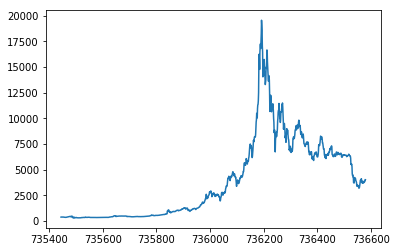

In [24]:
plt.plot(coin_day['Close'])

### 1.2 Aşırı değer Analizi olarak winsorize uygulaması

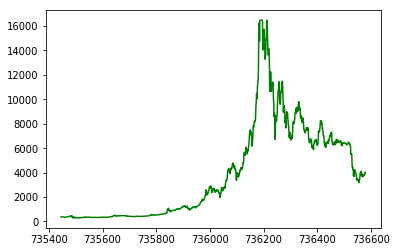

In [25]:
from scipy.stats.mstats import winsorize
coin_day_win=winsorize(coin_day['Close'], (0, 0.01))
coin_day_win=np.ma.filled(coin_day_win)
#masked array ı seriye döndürmek
coin_day_win_series = pd.Series(coin_day_win,index=coin_day.index)  
Coin_day_win_series=coin_day_win_series
plot.plot(coin_day_win_series,color="green")
plot.show()

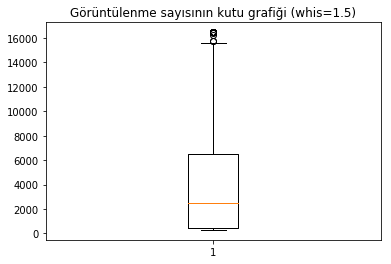

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.boxplot(coin_day_win_series )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)")
plt.show()

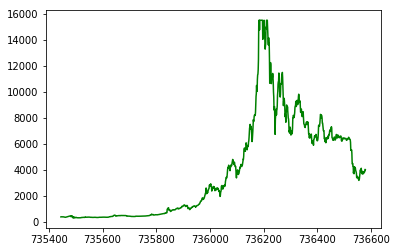

In [27]:
from scipy.stats.mstats import winsorize
coin_day_win=winsorize(coin_day['Close'], (0, 0.015))
coin_day_win=np.ma.filled(coin_day_win)
#masked array ı seriye döndürmek
coin_day_win_series = pd.Series(coin_day_win,index=coin_day.index)  
plot.plot(coin_day_win_series,color="green")
plot.show()

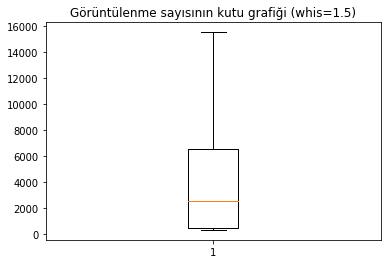

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.boxplot(coin_day_win_series )
plt.title("Görüntülenme sayısının kutu grafiği (whis=1.5)")
plt.show()

In [29]:
# En son haliyle verimiz "coin_day_win_series"

## 2 Temizlenmiş verinin ARIMA ile modellenmesi

### 2.1 Verinin Stationary durumu

In [138]:
# Biz önceki verileri formülüze ederek gelecek veri için kullanacağımızdan ,'Univariate Time Series Forecasting' yapmış olacagız.
# Modelleme için Predictorler de kullansaydık o zaman 'Multi Variate Time Series Forecasting' yapmıs olacaktık


# Autoregressive Integrated Moving Average (ARIMA)

#*Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + 
#                   Linear Combination of Lagged forecast errors (upto q lags)

#Each component functions as a parameter

#* p: the lag order.
#* d: the degree of differencing.
#* q: the order of the moving average.

# ŷt   =   μ + ϕ1 yt-1 +…+ ϕp yt-p - θ1et-1 -…- θqet-q


In [30]:
#Stationary olup olmadığını olçuyoruz
result = adfuller(coin_day_win_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.793928
p-value: 0.383480
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [31]:
# p>0.05 oldugundan not stationarity

In [32]:
# Stationarity yapmak için ardısık farklara bakacagız

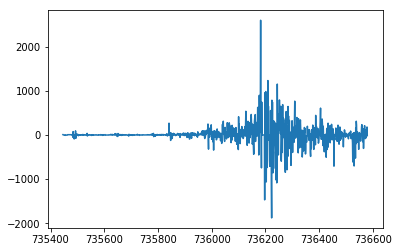

In [33]:
coin_day_diffe = coin_day_win_series - coin_day_win_series.shift()
plot.plot(coin_day_diffe)
plot.show()

In [34]:
#Stationary olup olmadığını olçuyoruz
coin_day_diffe.dropna(inplace=True)
result = adfuller(coin_day_diffe)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.772988
p-value: 0.000001
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [35]:
# p değerine baktığımızda stationary oldugunu goruruz. Böylece ARIMA d degerı 1 ya da 2 olarak secılecek

### 2.2 ARIMA Modelinde uygun order ın belirlemesi

In [141]:
# ARIMA uygun orderları belirlemek için AIC değerlerine ve summary ile coeffient değerlerine bakıcaz.
# p ve q yu range(0,10) kombinleyip , d değerini 1 ve 2 olacak şekilde kombinleyeceğiz. 

In [37]:
import itertools
p=range(0,10)
q=range(0,10)
d=range(1,3)
pdq = list(itertools.product(p,d,q))
X=coin_day_win_series.values


In [38]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(coin_day_win_series,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 1, 0) 15712.749537357973
(0, 1, 1) 15687.178386846308
(0, 1, 2) 15689.152117712036
(0, 1, 3) 15690.499407170242
(0, 1, 4) 15692.466732905863
(0, 1, 5) 15694.375122843425
(0, 1, 6) 15689.5228061253
(0, 1, 7) 15690.95718897598
(0, 1, 8) 15692.692234329219
(0, 1, 9) 15693.022911878175
(0, 2, 0) 16295.048337483053
(0, 2, 1) 15708.443387689042
(0, 2, 2) 15682.718572624055
(1, 1, 0) 15687.367732517816
(1, 1, 1) 15689.139402895229
(1, 1, 3) 15692.473541679708
(1, 2, 0) 16081.91150899488
(1, 2, 1) 15682.879816567396
(1, 2, 2) 15684.670452875464
(1, 2, 3) 15684.531479812435
(1, 2, 4) 15686.47801249729
(1, 2, 5) 15686.863375455605
(1, 2, 6) 15688.372336473758
(1, 2, 7) 15689.372171519426
(1, 2, 8) 15686.785064177788
(1, 2, 9) 15687.353951439818
(2, 1, 0) 15689.212902951112
(2, 1, 1) 15690.823292792598
(2, 1, 2) 15689.386960157311
(2, 1, 3) 15670.32220121449
(2, 2, 0) 15962.221374880877
(2, 2, 1) 15684.739031381576
(2, 2, 2) 15685.34944101368
(2, 2, 3) 15686.421756763308
(2, 2, 4) 15681.34124

In [131]:
model_arima = ARIMA(Coin_day_win_series,order=(3, 1, 2))
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1134
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -7827.086
Method:                       css-mle   S.D. of innovations            240.525
Date:                Tue, 27 Aug 2019   AIC                          15668.171
Time:                        12:42:22   BIC                          15703.406
Sample:                             1   HQIC                         15681.481
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2226      8.871      0.363      0.716     -14.165      20.610
ar.L1.D.y      1.8806      0.031     60.329      0.000       1.820       1.942
ar.L2.D.y     -1.2560      0.051    -24.498      0.000      -1.357      -1.156
ar.L3.D.y      0.1857      0.030      6.268      0.000       0.128       0.244
ma.L1.D.y     -1.7429      0.013   -137.873      0.000      -1.768      -1.718
ma.L2.D.y      0.9786      0.013     76.404      0.000       0.954       1.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9161           -0.5028j            1.0450           -0.0799
AR.2            0.9161           +0.5028j            1.0450            0.0799
AR.3            4.9307           -0.0000j            4.9307           -0.0000
MA.1            0.8905           -0.4784j            1.0109           -0.0785
MA.2            0.8905           +0.4784j            1.0109            0.0785
-----------------------------------------------------------------------------
"""

In [132]:
# SUmmary ozelliğiyle parametrelere bakınca p degeri uygunluguna gore asağıdaki orderler kaldı.

* (9, 2, 0)               15759.736543133471           
* (8, 2, 0)               15769.579822427524          
* (7, 2, 0)               15784.513482143753
* (6, 2, 0)               15795.427997469658
* (5, 2, 0)               15808.715509124208
* (5, 1, 6)               15668.602179811072           
* (5, 1, 4)               15661.278520972475           
* (4, 2, 0)               15858.123666266067
* (3, 2, 5)               15671.367303232253           
* (3, 2, 3)               15678.209459596876           
* (3, 2, 0)               15908.740916830191
* (3, 1, 3)               15690.162330503692           
* (3, 1, 2)               15668.171211668823           
* (2, 2, 4)               15681.341247691584           
* (2, 2, 0)               15962.221374880877
* (2, 1, 3)               15670.32220121449
* (1, 2, 3)               15684.531479812435
* (1, 2, 1)               15682.879816567396
* (1, 2, 0)               16081.91150899488
* (1, 1, 0)               15687.367732517816

In [140]:
# Hangi orderlerin uygun olacağına en düşük AIC değerini seçtim, 
# ama modellerken 'SVD did not converge' hatası aldığım için 
# (2,2,4) ve bir sonrakı değer olan (3,2,5) değerinin hata ortalamasına göre karar verdim.

In [133]:
model_arima = ARIMA(Coin_day_win_series,order=(3, 2, 5))
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 1133
Model:                 ARIMA(3, 2, 5)   Log Likelihood               -7825.684
Method:                       css-mle   S.D. of innovations            241.020
Date:                Tue, 27 Aug 2019   AIC                          15671.367
Time:                        12:42:50   BIC                          15721.694
Sample:                             2   HQIC                         15690.379
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0157      0.026     -0.604      0.546      -0.067       0.035
ar.L1.D2.y    -1.6337      0.030    -54.370      0.000      -1.693      -1.575
ar.L2.D2.y    -1.6117      0.029    -55.341      0.000      -1.669      -1.555
ar.L3.D2.y    -0.9464      0.027    -35.137      0.000      -0.999      -0.894
ma.L1.D2.y     0.7998      0.041     19.508      0.000       0.719       0.880
ma.L2.D2.y     0.1076      0.024      4.508      0.000       0.061       0.154
ma.L3.D2.y    -0.6413      0.020    -32.618      0.000      -0.680      -0.603
ma.L4.D2.y    -1.0695      0.032    -33.579      0.000      -1.132      -1.007
ma.L5.D2.y    -0.1966      0.030     -6.657      0.000      -0.254      -0.139
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0247           -0.0000j            1.0247           -0.5000
AR.2           -0.3392           -0.9572j            1.0155           -0.3042
AR.3           -0.3392           +0.9572j            1.0155            0.3042
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.3224           -0.9627j            1.0152           -0.3014
MA.3           -0.3224           +0.9627j            1.0152            0.3014
MA.4           -1.0372           -0.0000j            1.0372           -0.5000
MA.5           -4.7581           -0.0000j            4.7581           -0.5000
-----------------------------------------------------------------------------
"""

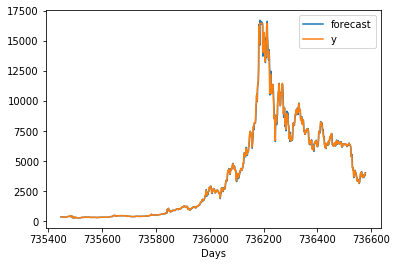

In [134]:
model_arima_fit.plot_predict(dynamic=False)
plt.show()

In [102]:
len_train = len(coin_day_win_series)-200
# Divide into train and test
train_arima= coin_day_win_series[0:len_train]
test_arima = coin_day_win_series[len_train:len(coin_day_win_series)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()
test_arima_diff=coin_day_diffe[len_train-1:len(coin_day_win_series)]

Printing Predicted vs Expected Values...


t=0.000000 , predicted = 271.663575,   expected = -327.179264,   error = 183.032027 %
t=1.000000 , predicted = 257.614570,   expected = -91.746604,   error = 380.789216 %
t=2.000000 , predicted = 58.645068,   expected = 164.862486,   error = 64.427888 %
t=3.000000 , predicted = -97.365208,   expected = 26.033618,   error = 473.997988 %
t=4.000000 , predicted = 3.859630,   expected = -117.399094,   error = 103.287615 %
t=5.000000 , predicted = 60.149912,   expected = 10.593441,   error = 467.803339 %
t=6.000000 , predicted = -17.831950,   expected = -222.314569,   error = 91.978956 %
t=7.000000 , predicted = 235.383616,   expected = 444.299771,   error = 47.021441 %
t=8.000000 , predicted = -375.474517,   expected = 15.870083,   error = 2465.926565 %
t=9.000000 , predicted = -37.839106,   expected = 74.685597,   error = 150.664529 %
t=10.000000 , predicted = -33.074620,   expected = 186.821896,   error = 117.703824 %
t=11.000000 , predicted = -

t=96.000000 , predicted = 42.700792,   expected = 37.944604,   error = 12.534557 %
t=97.000000 , predicted = -16.057593,   expected = 180.773181,   error = 108.882730 %
t=98.000000 , predicted = -194.153733,   expected = -122.508819,   error = 58.481433 %
t=99.000000 , predicted = 115.965199,   expected = 33.263479,   error = 248.626187 %
t=100.000000 , predicted = 12.961500,   expected = 0.031833,   error = 40616.754223 %
t=101.000000 , predicted = -23.701036,   expected = -32.718389,   error = 27.560503 %
t=102.000000 , predicted = 9.402173,   expected = -92.559139,   error = 110.158017 %
t=103.000000 , predicted = 113.289201,   expected = 77.574250,   error = 46.039698 %
t=104.000000 , predicted = -54.812009,   expected = 6.350986,   error = 963.047212 %
t=105.000000 , predicted = -32.366506,   expected = 19.231632,   error = 268.298281 %
t=106.000000 , predicted = -4.621114,   expected = -23.740146,   error = 80.534603 %
t=107.000000 , predicted = 48.477954,   expected = 41.983222,

t=192.000000 , predicted = 91.907360,   expected = -81.886771,   error = 212.237128 %
t=193.000000 , predicted = 75.282274,   expected = 112.901059,   error = 33.320135 %
t=194.000000 , predicted = -179.330111,   expected = 36.404788,   error = 592.600342 %
t=195.000000 , predicted = -14.365227,   expected = -60.527583,   error = 76.266644 %
t=196.000000 , predicted = 117.234832,   expected = 54.622736,   error = 114.626437 %
t=197.000000 , predicted = -104.676713,   expected = 10.405500,   error = 1105.974852 %
t=198.000000 , predicted = -62.106666,   expected = 181.029889,   error = 134.307410 %
t=199.000000 , predicted = -83.656168,   expected = -15.771206,   error = 430.436102 %

 Mean Error in Predicting Test Case Articles : 864.670024 %


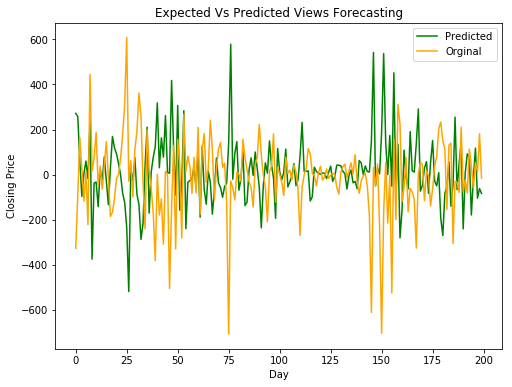

In [103]:
print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
# We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 2, 4))
    model_fit = model.fit(disp=-1)
    output = model_fit.predict(start=len_train+t, end=len_train+t)

    pred_value = output

    original_value = test_arima[736380+t]
    history.append(original_value)
    
    
    # Calculating the error
    error = abs(((abs(pred_value - test_arima_diff[736380+t])) / test_arima_diff[736380+t]) * 100)
    error_list.append(error)
    print('t=%f , predicted = %f,   expected = %f,   error = %f'  % (t,pred_value, test_arima_diff[736380+t], error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima_diff))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, test_arima_diff, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()


In [106]:
len_train = len(coin_day_win_series)-200
# Divide into train and test
train_arima= coin_day_win_series[0:len_train]
test_arima = coin_day_win_series[len_train:len(coin_day_win_series)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()
test_arima_diff=coin_day_diffe[len_train-1:len(coin_day_win_series)]
test_arima_diff2=test_arima_diff-test_arima_diff.shift()
test_arima_diff2[736380]=test_arima_diff2[736381]

Printing Predicted vs Expected Values...


t=0.000000 , predicted = 269.717283,   expected = 235.432660,   error = 14.562390 %
t=1.000000 , predicted = 256.297560,   expected = 235.432660,   error = 8.862364 %
t=2.000000 , predicted = 57.697997,   expected = 256.609090,   error = 77.515217 %
t=3.000000 , predicted = -94.807287,   expected = -138.828868,   error = 31.709241 %
t=4.000000 , predicted = 4.206545,   expected = -143.432712,   error = 102.932765 %
t=5.000000 , predicted = 58.822195,   expected = 127.992535,   error = 54.042480 %
t=6.000000 , predicted = -17.750166,   expected = -232.908010,   error = 92.378894 %
t=7.000000 , predicted = 235.786656,   expected = 666.614340,   error = 64.629225 %
t=8.000000 , predicted = -376.054208,   expected = -428.429687,   error = 12.224988 %
t=9.000000 , predicted = -34.425317,   expected = 58.815514,   error = 158.531015 %
t=10.000000 , predicted = -37.548916,   expected = 112.136299,   error = 133.485068 %
t=11.000000 , predicted = -136

t=96.000000 , predicted = 46.194193,   expected = 25.074326,   error = 84.229050 %
t=97.000000 , predicted = -19.339355,   expected = 142.828576,   error = 113.540256 %
t=98.000000 , predicted = -190.015875,   expected = -303.282000,   error = 37.346801 %
t=99.000000 , predicted = 113.482805,   expected = 155.772299,   error = 27.148276 %
t=100.000000 , predicted = 13.750972,   expected = -33.231646,   error = 141.379150 %
t=101.000000 , predicted = -24.604069,   expected = -32.750222,   error = 24.873581 %
t=102.000000 , predicted = 10.470198,   expected = -59.840750,   error = 117.496769 %
t=103.000000 , predicted = 112.484777,   expected = 170.133389,   error = 33.884361 %
t=104.000000 , predicted = -54.951417,   expected = -71.223264,   error = 22.846253 %
t=105.000000 , predicted = -31.790368,   expected = 12.880646,   error = 346.807250 %
t=106.000000 , predicted = -4.509972,   expected = -42.971778,   error = 89.504805 %
t=107.000000 , predicted = 48.494572,   expected = 65.7233

t=192.000000 , predicted = 96.228208,   expected = -58.994563,   error = 263.113691 %
t=193.000000 , predicted = 70.847551,   expected = 194.787830,   error = 63.628348 %
t=194.000000 , predicted = -174.682336,   expected = -76.496271,   error = 128.354055 %
t=195.000000 , predicted = -17.800531,   expected = -96.932372,   error = 81.636134 %
t=196.000000 , predicted = 119.738957,   expected = 115.150319,   error = 3.984911 %
t=197.000000 , predicted = -107.122253,   expected = -44.217236,   error = 142.263566 %
t=198.000000 , predicted = -58.927173,   expected = 170.624389,   error = 134.536196 %
t=199.000000 , predicted = -86.915867,   expected = -196.801095,   error = 55.835679 %

 Mean Error in Predicting Test Case Articles : 126.865746 %


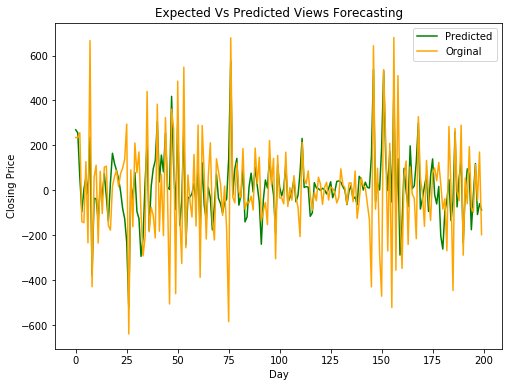

In [107]:
print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
# We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(3, 2, 5))
    model_fit = model.fit(disp=-1)
    output = model_fit.predict(start=len_train+t, end=len_train+t)

    pred_value = output

    original_value = test_arima[736380+t]
    history.append(original_value)
    
    
    # Calculating the error
    error = abs(((abs(pred_value - test_arima_diff2[736380+t])) / test_arima_diff2[736380+t]) * 100)
    error_list.append(error)
    print('t=%f , predicted = %f,   expected = %f,   error = %f'  % (t,pred_value, test_arima_diff2[736380+t], error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima_diff2))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, test_arima_diff2, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

### 2.3 Belirlediğimiz modelle tahmin (forecast)

In [127]:
#ilk otuz adım için forecast yapıyorum

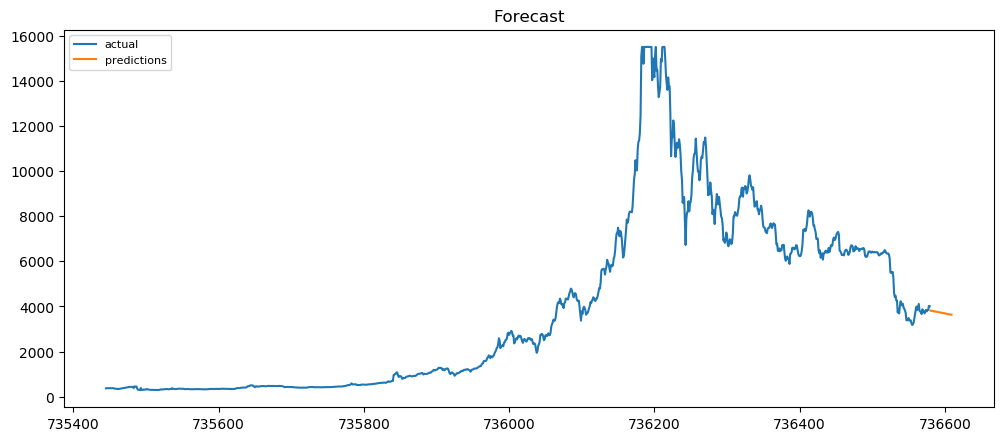

In [126]:
forecast_index=range(736580 ,736610)

# Build Model
model = ARIMA(coin_day_win_series, order=(3, 2, 5))  
fitted = model.fit(disp=-1)  

# Forecast
output = model_fit.forecast(steps=30)[0]
predictions=output

# Make as pandas series
predictions_series=pd.Series(predictions, index=forecast_index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(coin_day_win_series, label='actual')
plt.plot(predictions_series, label='predictions')
plt.title('Forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [128]:
#test verisini de forecast a katarak 30 veriyi tahmın ettim

In [135]:
len_train = len(Coin_day_win_series)-200
# Divide into train and test
train_arima= Coin_day_win_series[0:len_train]
test_arima = Coin_day_win_series[len_train:len(Coin_day_win_series)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

Printing Predicted vs Expected Values...




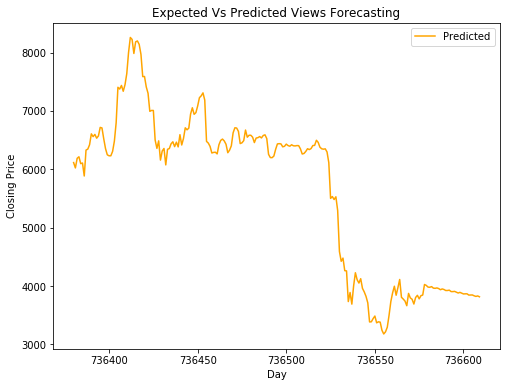

In [136]:
print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. 
# We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(230):
    model = ARIMA(history, order=(3, 2, 5) )
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast()

    pred_value = output[0]
    
    if(t<len(test_arima)):
        original_value = test_arima[736380+t]
        history.append(original_value)
    elif(t>=len(test_arima)):
        original_value = pred_value
        history.append(original_value)
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    #print('t=%f , predicted = %f,   expected = %f,   error = %f ' % (t,pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
#print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t for t in range(736380 ,736610)]
labels={'Orginal','Predicted'}
#plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()